In [1]:
import csv
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
# Get dates and rainfall data from data file, which is at column 19.

In [3]:
filename = 'montreal_weather_2018.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    dates, rainfalls, totals = [], [], []
    for row in reader:
        try:
            current_date = datetime.strptime(row[0], "%m-%d-%Y")
            rainfall = float(row[4])
        except ValueError:
            print(current_date, 'missing data')
        else:
            dates.append(current_date)
            rainfalls.append(rainfall)
        if totals:
            totals.append(totals[-1] + rainfall)
        else:
            totals.append(rainfall)

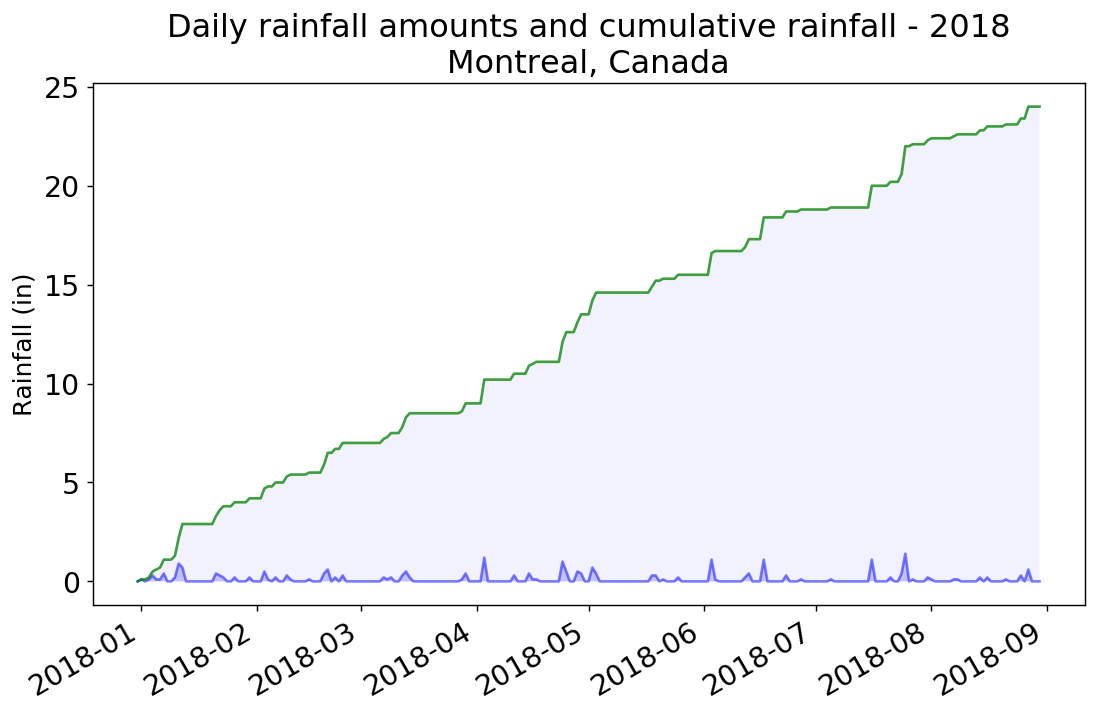

In [5]:
# Plot data.
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(dates, rainfalls, c='blue', alpha=0.5)
plt.fill_between(dates, rainfalls, facecolor='blue', alpha=0.2)

plt.plot(dates, totals, c='green', alpha=0.75)
plt.fill_between(dates, totals, facecolor='blue', alpha=0.05)

# Format plot.
title = "Daily rainfall amounts and cumulative rainfall - 2018\nMontreal, Canada"
plt.title(title, fontsize=18)
plt.xlabel('', fontsize=14)
fig.autofmt_xdate()
plt.ylabel("Rainfall (in)", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()